In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from modules.forecasting.data.preprocess_coin import CoinPreprocessor
from modules.forecasting.data.preprocess_panel import PanelPreprocessor

coin_pre = CoinPreprocessor()
panel_pre = PanelPreprocessor()

In [2]:
df_btc = coin_pre.load_data("BTC/USDT", interval="1h")

df_btc.head()
df_btc.info()
df_btc.describe()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1047 entries, 2025-08-14 17:00:00+00:00 to 2025-09-27 07:00:00+00:00
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   open      1047 non-null   float64
 1   high      1047 non-null   float64
 2   low       1047 non-null   float64
 3   close     1047 non-null   float64
 4   volume    1047 non-null   float64
 5   interval  1047 non-null   object 
 6   symbol    1047 non-null   object 
 7   exchange  1047 non-null   object 
dtypes: float64(5), object(3)
memory usage: 73.6+ KB


,open,high,low,close,volume
count,1047.00000,1047.000000,1047.000000,1047.000000,1047.000000
mean,113313.05086,113544.512350,113061.609618,113305.269427,563.990027
std,2776.80831,2753.480203,2805.725447,2775.828472,511.763664
min,107409.09000,107759.990000,107255.000000,107409.100000,82.991220
25%,111125.54500,111371.305000,110900.540000,111118.770000,285.034280
50%,113090.13000,113386.310000,112828.620000,113084.160000,431.565190
75%,115660.83000,115791.980000,115480.375000,115659.385000,661.247995
max,119082.83000,119216.820000,118879.820000,119082.820000,6271.742230


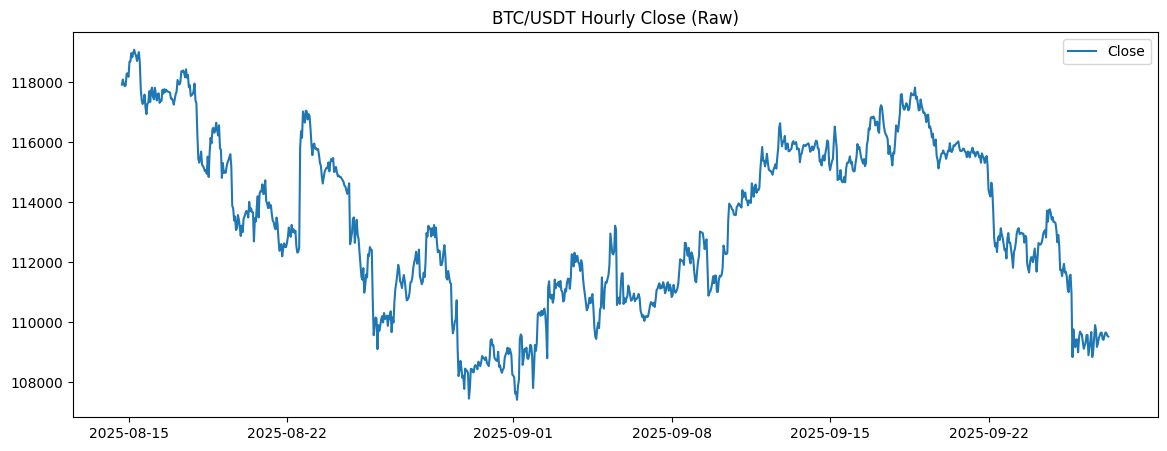

In [3]:
plt.figure(figsize=(14,5))
plt.plot(df_btc.index, df_btc['close'], label='Close')
plt.title("BTC/USDT Hourly Close (Raw)")
plt.legend()
plt.show()

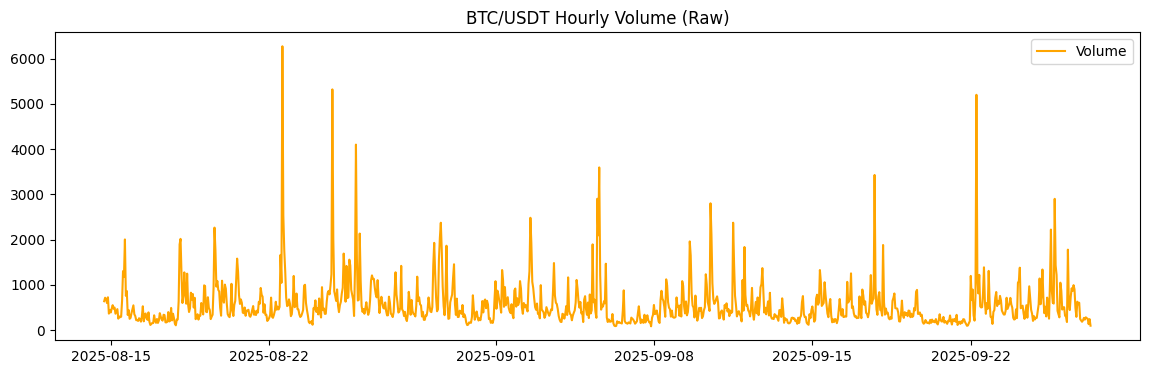

In [4]:
plt.figure(figsize=(14,4))
plt.plot(df_btc.index, df_btc['volume'], label='Volume', color='orange')
plt.title("BTC/USDT Hourly Volume (Raw)")
plt.legend()
plt.show()

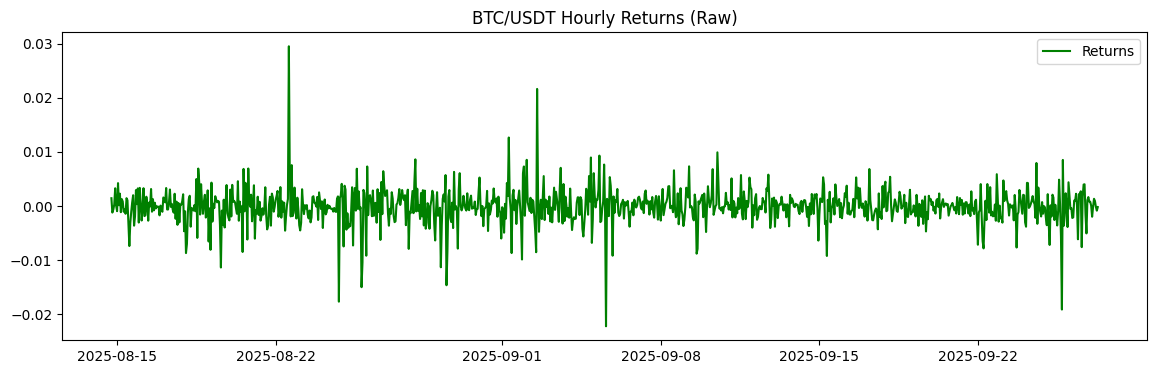

In [5]:
df_btc['returns'] = df_btc['close'].pct_change()
plt.figure(figsize=(14,4))
plt.plot(df_btc.index, df_btc['returns'], label='Returns', color='green')
plt.title("BTC/USDT Hourly Returns (Raw)")
plt.legend()
plt.show()

In [6]:
df_btc_proc, _ = coin_pre.preprocess(
    df=df_btc,
    symbol="BTC/USDT",
    input_interval="1h",
    target_freq="D",  
    fit_scaler=False,  
    save_scaler=False,  
    fill_method="ffill",
    drop_initial_na=True,
    return_numpy=False 
)

df_btc_proc.head()

D:\python_projects\crypto-analytics-platform\src\modules\forecasting\data\preprocess_coin.py:117: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  full_idx = pd.date_range(start=start, end=end, freq=freq_alias, tz='UTC')
D:\python_projects\crypto-analytics-platform\src\modules\forecasting\data\preprocess_coin.py:204: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['close_lag1'] = df['close'].shift(1).fillna(method='bfill')


,open,high,low,close,volume,returns,close_lag1,volatility,log_return,vol_24,...,sma_7,sma_21,ema_8,ema_20,volume_pct_change,volume_zscore_30,hour,dayofweek,month,is_month_start
2025-08-14 00:00:00+00:00,117866.42,118535.00,117180.00,118295.09,4164.05696,0.000000,118295.09,0.000000,0.000000,0.000000,...,118295.0900,118295.0900,118295.090000,118295.090000,0.000000,0.000000,0,3,8,0
2025-08-15 00:00:00+00:00,118295.09,119216.82,116803.99,117342.05,13623.33874,-0.008056,118295.09,0.005697,-0.008089,0.005720,...,117818.5700,117818.5700,118083.303333,118204.324286,2.271650,0.707107,0,4,8,0
2025-08-16 00:00:00+00:00,117342.04,117898.99,117143.98,117380.66,6393.68117,0.000329,117342.05,0.004749,0.000329,0.004768,...,117672.6000,117672.6000,117927.160370,118125.880068,-0.530682,-0.337044,0,5,8,0
2025-08-17 00:00:00+00:00,117380.66,118575.00,117172.21,117405.01,5898.64192,0.000207,117380.66,0.004120,0.000207,0.004136,...,117605.7025,117605.7025,117811.126955,118057.225776,-0.077426,-0.387893,0,6,8,0
2025-08-18 00:00:00+00:00,117405.01,117543.75,114640.14,116227.05,17745.93954,-0.010033,117405.01,0.005102,-0.010084,0.005125,...,117329.9720,117329.9720,117459.109854,117882.923321,2.008479,1.402649,0,0,8,0


<Axes: title={'center': 'BTC/USDT Daily Close'}>

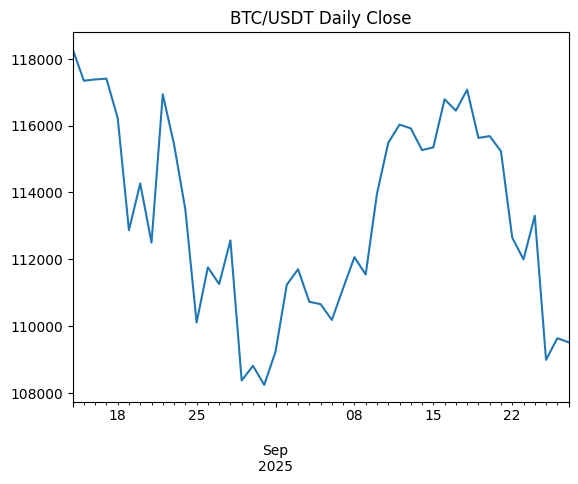

In [7]:
df_btc_proc['close'].plot(title="BTC/USDT Daily Close")

array([<Axes: >, <Axes: >], dtype=object)

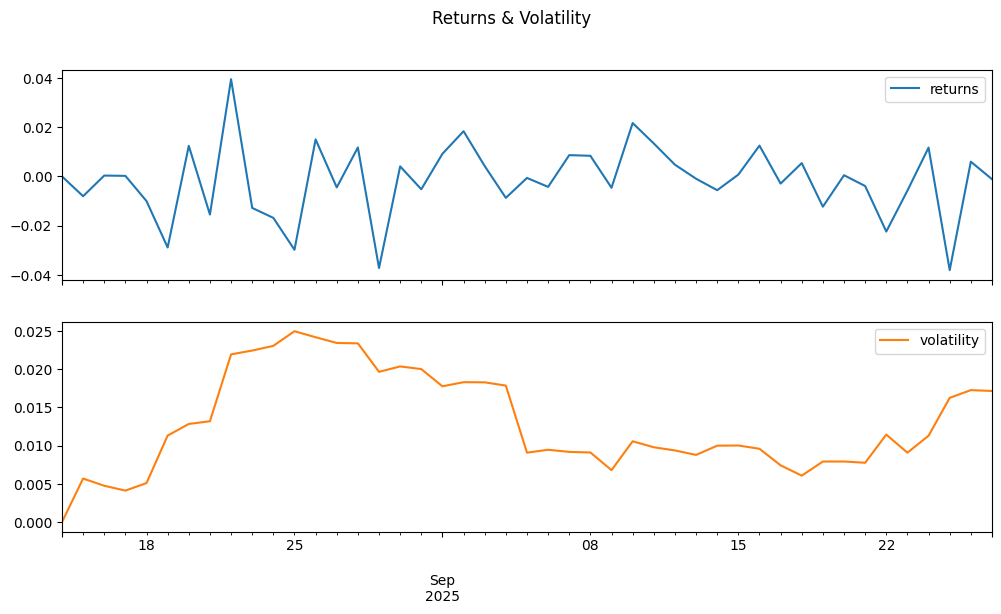

In [8]:
df_btc_proc[['returns', 'volatility']].plot(subplots=True, figsize=(12,6), title="Returns & Volatility")

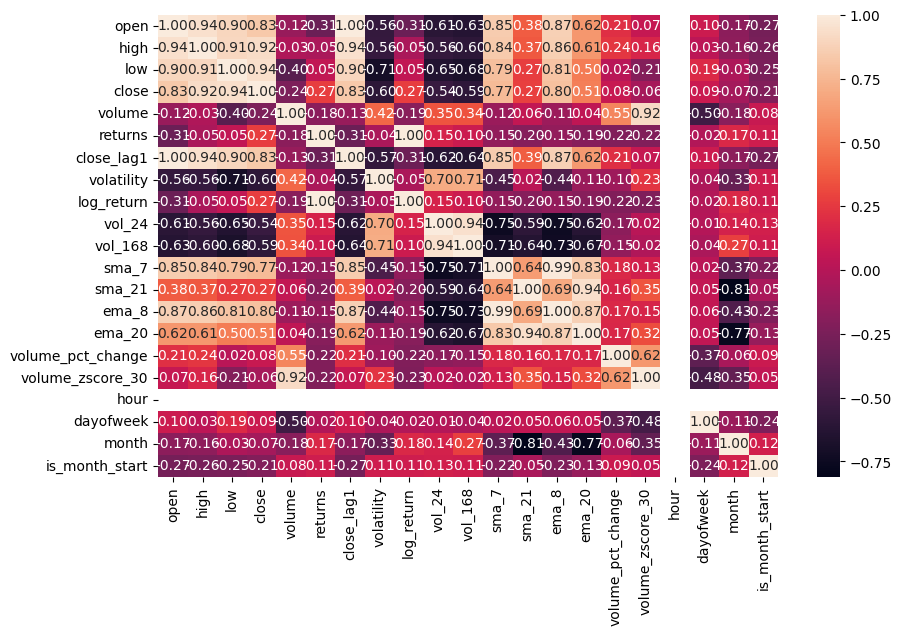

In [9]:
plt.figure(figsize=(10, 6))  
sns.heatmap(df_btc_proc.corr(), annot=True, fmt=".2f")
plt.show()

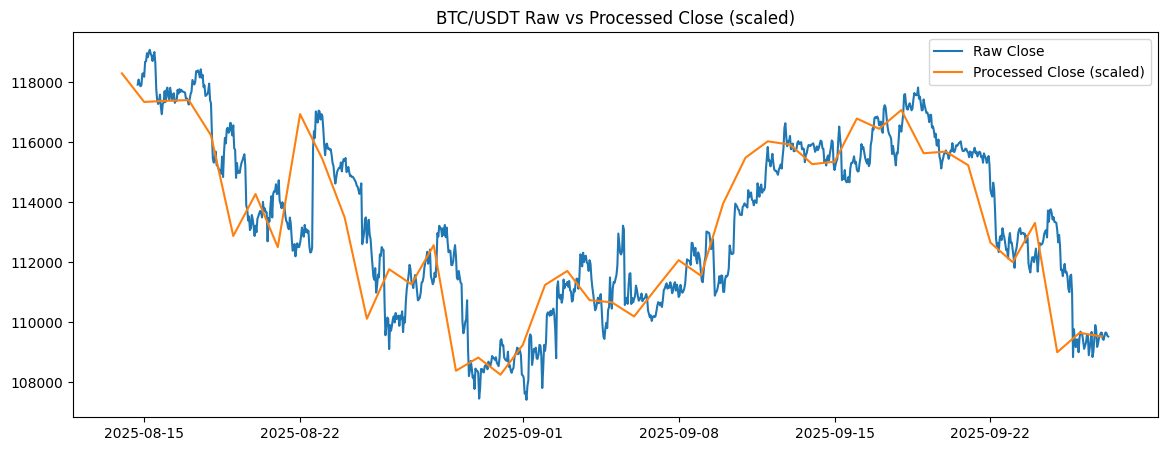

In [10]:
plt.figure(figsize=(14,5))
plt.plot(df_btc.index, df_btc['close'], label='Raw Close')
plt.plot(df_btc_proc.index, df_btc_proc['close'], label='Processed Close (scaled)')
plt.title("BTC/USDT Raw vs Processed Close (scaled)")
plt.legend()
plt.show()

In [11]:
print(df_btc_proc[['close', 'open', 'high', 'low']].head())

                               close       open       high        low
2025-08-14 00:00:00+00:00  118295.09  117866.42  118535.00  117180.00
2025-08-15 00:00:00+00:00  117342.05  118295.09  119216.82  116803.99
2025-08-16 00:00:00+00:00  117380.66  117342.04  117898.99  117143.98
2025-08-17 00:00:00+00:00  117405.01  117380.66  118575.00  117172.21
2025-08-18 00:00:00+00:00  116227.05  117405.01  117543.75  114640.14
